In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

<h1>1)</h1>

A sample of 25 brands of cigarette has been tested for tar and nicotine contents, carbonmonoxide (mgs) emitted by
cigarette smoke, and cigarette weight (g). Past studies have shown that the amount CO emitted increases with the
tar and nicotine content.

a) Model the CO emitted by cigratte as a linear function of the other three quantities. Which variables are significant and
not significant in the model ? What are the fitted model coefficients ?

b) Remove the most significant variable in a) and refit the model. How do the model coefficients and your conclusion
about the significance of variables change compared to a) ? 

In [2]:
smoke = pd.read_excel('data\\HW1-Dataset.xlsx' , sheet_name = 'CO-smoke')
smoke

,TAR,NICOTINE,WEIGHT,CO
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


In [3]:
smoke.corr()

,TAR,NICOTINE,WEIGHT,CO
TAR,1.000000,0.976608,0.490765,0.957485
NICOTINE,0.976608,1.000000,0.500183,0.925947
WEIGHT,0.490765,0.500183,1.000000,0.463959
CO,0.957485,0.925947,0.463959,1.000000


## Fit the Model

In [10]:
smoke = sm.add_constant(smoke)
model = ols('CO ~ TAR + NICOTINE + WEIGHT', data = smoke).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.907   
Dependent Variable: CO               AIC:                93.0187 
Date:               2020-09-16 18:26 BIC:                97.8942 
No. Observations:   25               Log-Likelihood:     -42.509 
Df Model:           3                F-statistic:        78.98   
Df Residuals:       21               Prob (F-statistic): 1.33e-11
R-squared:          0.919            Scale:              2.0901  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     3.2022    3.4618   0.9250  0.3655   -3.9969  10.4013
TAR           0.9626    0.2422   3.9736  0.0007    0.4588   1.4663
NICOTINE     -2.6317    3.9006  -0.6747  0.5072  -10.7433   5.4800
WEIGHT       -0.1305    3.8853  -0.0336  0.9735   -8.2105   7.9495
-----------------------------------------------------------------
Omnibus:               0.052        Durbin-Watson:          2.860
Prob(Omnibus):         0.974        Jarque-Bera (JB):       0.223
Skew:                  -0.087       Prob(JB):               0.895
Kurtosis:              2.572        Condition No.:          242  
=================================================================

"""

In [4]:
smoke = sm.add_constant(smoke)
model = sm.OLS(smoke['CO'], smoke.drop('CO', axis = 1)).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.907   
Dependent Variable: CO               AIC:                93.0187 
Date:               2020-09-16 18:24 BIC:                97.8942 
No. Observations:   25               Log-Likelihood:     -42.509 
Df Model:           3                F-statistic:        78.98   
Df Residuals:       21               Prob (F-statistic): 1.33e-11
R-squared:          0.919            Scale:              2.0901  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
const         3.2022    3.4618   0.9250  0.3655   -3.9969  10.4013
TAR           0.9626    0.2422   3.9736  0.0007    0.4588   1.4663
NICOTINE     -2.6317    3.9006  -0.6747  0.5072  -10.7433   5.4800
WEIGHT       -0.1305    3.8853  -0.0336  0.9735   -8.2105   7.9495
-----------------------------------------------------------------
Omnibus:               0.052        Durbin-Watson:          2.860
Prob(Omnibus):         0.974        Jarque-Bera (JB):       0.223
Skew:                  -0.087       Prob(JB):               0.895
Kurtosis:              2.572        Condition No.:          242  
=================================================================

"""

TAR and WEIGHT are significant at alpha = 0.05 and NICOTINE is not significant in this model. So, we'll remove TAR that's the most significant variable then refit the model.

In [5]:
model1 = sm.OLS(smoke['CO'], smoke.drop(columns = ['CO', 'TAR'])).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.844   
Dependent Variable: CO               AIC:                105.0357
Date:               2020-09-16 18:24 BIC:                108.6924
No. Observations:   25               Log-Likelihood:     -49.518 
Df Model:           2                F-statistic:        66.13   
Df Residuals:       22               Prob (F-statistic): 4.97e-10
R-squared:          0.857            Scale:              3.4952  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
const          1.6140    4.4466  0.3630  0.7201   -7.6078  10.8357
NICOTINE      12.3881    1.2447  9.9524  0.0000    9.8067  14.9695
WEIGHT         0.0588    5.0240  0.0117  0.9908  -10.3602  10.4779
-----------------------------------------------------------------
Omnibus:              0.376        Durbin-Watson:           2.676
Prob(Omnibus):        0.829        Jarque-Bera (JB):        0.520
Skew:                 0.215        Prob(JB):                0.771
Kurtosis:             2.440        Condition No.:           30   
=================================================================

"""

In refitted model, p-value of NICOTINE is now significant at 5%. that's mean TAR and NICOTINE are significantly affect CO2 amount and it's not independent from each other

In [6]:
import numpy.linalg as LA

def press(Xreg, resid):
    H = Xreg@LA.pinv(Xreg)
    hii = np.diag(H)
    return(LA.norm(resid/(1-hii))**2.0)

def r2pred(Xreg, model):
    SST = model.centered_tss
    SSE = press(Xreg, model.resid)
    return (1-SSE/SST)

In [7]:
r2pred(smoke.drop(['CO',], axis = 1), model)

0.8340397278700217

<h1>2)</h1>

A study to determine if a common pulsing electromagnetic field (PEMF)
treatment could moderate the substantial osteopenia that occurs after forearm
disuse was conducted. Subjects were randomized into four groups after a
distal radius fracture, or carpal surgery requiring immobilization in a cast.
Active or identical sham PEMF transducers were worn on the distal forearm
for 1, 2, or 4 h/day for 8 weeks starting after cast removal ("baseline") when
bone density continues to decline. Bone mineral density (BMD) and bone
geometry were measured in the distal forearm by dual energy X-ray
absorptiometry (DXA) and peripheral quantitative computed tomography
(pQCT). The data below are the percent losses in BMD measurements on the
radius after 16 weeks for patients wearing the active or sham PEMF
transducers.

a. Is there evidence to support a clain that PEMF usage affects BMD loss?
If so, analyze the data to determine which specific treatments produce the
differences.

b. Analyze the residuals and comment on the model assumptions and accuracy

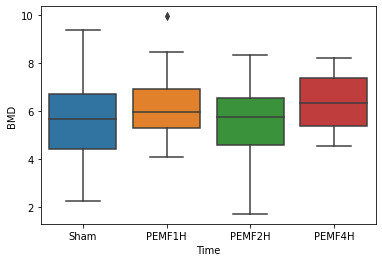

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


pemf = pd.read_excel('data\\HW1-Dataset.xlsx', sheet_name = 'PEMF')

Sham = pemf['Sham']
PEMF1H = pemf['PEMF1H']
PEMF2H = pemf['PEMF2H']
PEMF4H = pemf['PEMF4H']

pemf1 = pd.concat([Sham, PEMF1H, PEMF2H, PEMF4H], ignore_index = True)

# Create another form of PEMF DataFrame 'pemfx'
pemfx = pd.DataFrame({'Time': np.repeat(['Sham', 'PEMF1H', 'PEMF2H', 'PEMF4H'], 20),
                     'BMD':pemf1})

# Generate box plot
sns.boxplot(x = 'Time', y = 'BMD', data = pemfx)
plt.show()

The box plot shows that mean differences of these boxes is probably due to chance.

In [35]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('BMD ~ Time', data = pemfx).fit()
anv = sm.stats.anova_lm(model1) 
anv

,df,sum_sq,mean_sq,F,PR(>F)
Time,3.0,10.043504,3.347835,1.297941,0.281326
Residual,76.0,196.030085,2.579343,NaN,NaN


In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('BMD ~ C(Time)', data = pemfx).fit()
anv = sm.stats.anova_lm(model1) 
anv

,df,sum_sq,mean_sq,F,PR(>F)
C(Time),3.0,10.043504,3.347835,1.297941,0.281326
Residual,76.0,196.030085,2.579343,NaN,NaN


In the table above, P-value is greater than 0.05
<br>No significant difference at alpha = 0.05, no treatment effect.

In [36]:
from scipy import stats

y0 = pemf['Sham']
y1 = pemf['PEMF1H']
y2 = pemf['PEMF2H']
y3 = pemf['PEMF4H']
f0,pval = stats.levene(y0, y1, y2, y3);
print("Levene's test statistic: {:.5f}, p-value: {:.5f}".format(f0,pval))

Levene's test statistic: 1.03810, p-value: 0.38064


p-value > 0.05
<br>that means , the varience is not differ significantly among each treatment.

In [12]:
def check_anova_normality(group, x):

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=False)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

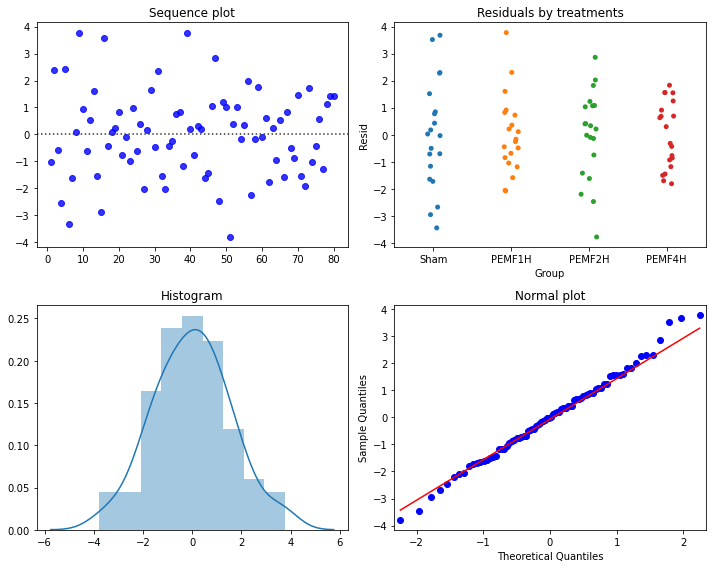

In [24]:
check_anova_normality(pemfx['Time'], model1.resid)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
PEMF1H PEMF2H  -0.6875 0.5286 -2.0216 0.6466  False
PEMF1H PEMF4H    0.185    0.9 -1.1491 1.5191  False
PEMF1H   Sham   -0.493 0.7414 -1.8271 0.8411  False
PEMF2H PEMF4H   0.8725 0.3217 -0.4616 2.2066  False
PEMF2H   Sham   0.1945    0.9 -1.1396 1.5286  False
PEMF4H   Sham   -0.678  0.539 -2.0121 0.6561  False
---------------------------------------------------


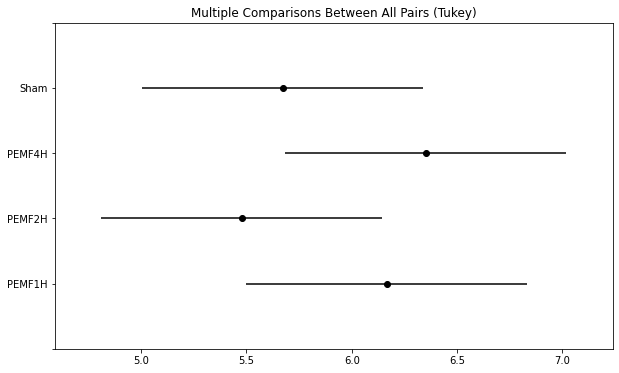

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

turkey = pairwise_tukeyhsd(pemfx['BMD'], pemfx['Time'], alpha=0.05)
print(turkey)
turkey.plot_simultaneous();

Pairwise Turkey HSD test also showed that, there's no difference in each pairs